In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('../wsi4-25L_dataset.csv')
df.head(10)

,Unnamed: 0,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,AgeGroup,RestingBP_Category,Cholesterol_Category,MaxHR_Category,Oldpeak_Category
0,0,M,ATA,0,Normal,N,Up,0,Young,Elevated,High,High,Normal
1,1,F,NAP,0,Normal,N,Flat,1,Middle-aged,High,Desirable,High,Normal
2,2,M,ATA,0,ST,N,Up,0,Young,Elevated,High,Low,Normal
3,3,F,ASY,0,Normal,Y,Flat,1,Middle-aged,Elevated,Borderline High,Moderate,Slight ST
4,4,M,NAP,0,Normal,N,Up,0,Middle-aged,High,Desirable,Moderate,Normal
5,5,M,NAP,0,Normal,N,Up,0,Young,Normal,Very High,High,Normal
6,6,F,ATA,0,Normal,N,Up,0,Middle-aged,Elevated,Borderline High,High,Normal
7,7,M,ATA,0,Normal,N,Up,0,Middle-aged,Normal,Borderline High,High,Normal
8,8,M,ASY,0,Normal,Y,Flat,1,Young,Elevated,Borderline High,Moderate,Slight ST
9,9,F,ATA,0,Normal,N,Up,0,Middle-aged,Normal,High,Moderate,Normal


In [71]:
def label_encode(series):
    categories = series.unique()
    cat_to_num = {cat: idx for idx, cat in enumerate(categories)}
    return series.map(cat_to_num)

for i, col_name in enumerate(df.columns):
    if i > 0: # skip index column
        df[col_name] = label_encode(df[col_name])

df.head(10)

,Unnamed: 0,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,AgeGroup,RestingBP_Category,Cholesterol_Category,MaxHR_Category,Oldpeak_Category
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,1,1,1,0,0
2,2,0,0,0,1,0,0,0,0,0,0,1,0
3,3,1,2,0,0,1,1,1,1,0,2,2,1
4,4,0,1,0,0,0,0,0,1,1,1,2,0
5,5,0,1,0,0,0,0,0,0,2,3,0,0
6,6,1,0,0,0,0,0,0,1,0,2,0,0
7,7,0,0,0,0,0,0,0,1,2,2,0,0
8,8,0,2,0,0,1,1,1,0,0,2,2,1
9,9,1,0,0,0,0,0,0,1,2,0,2,0


In [72]:
X = df.iloc[:, list(range(1,7))+list(range(8,12))] # range(1,... - skiping index col
X

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,AgeGroup,RestingBP_Category,Cholesterol_Category,MaxHR_Category
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,1,1,1,0
2,0,0,0,1,0,0,0,0,0,1
3,1,2,0,0,1,1,1,0,2,2
4,0,1,0,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
913,0,3,0,0,0,1,1,2,0,2
914,0,2,1,0,0,1,2,1,1,0
915,0,2,0,0,1,1,1,0,1,2
916,1,0,0,2,0,1,1,0,2,0


In [73]:
y = df.iloc[:, 7] # HeartDisease col
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25, test_size=0.2)
# random_state - the same random split every time
# X_test

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report
from metric_functions import get_metrics

def rank_model(y_test, y_pred, y_prob):
    # rf.score(X_test, y_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    print(get_metrics(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print(f"ROC AUC = {roc_auc}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# Learning
rf.fit(X_train, y_train)

# prediction
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

rank_model(y_test, y_pred, y_prob)


{'accuracy': 0.8586956521739131, 'precision': 0.8446601941747572, 'recall': 0.8969072164948454}
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        87
           1       0.84      0.90      0.87        97

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC = 0.9315677212939922


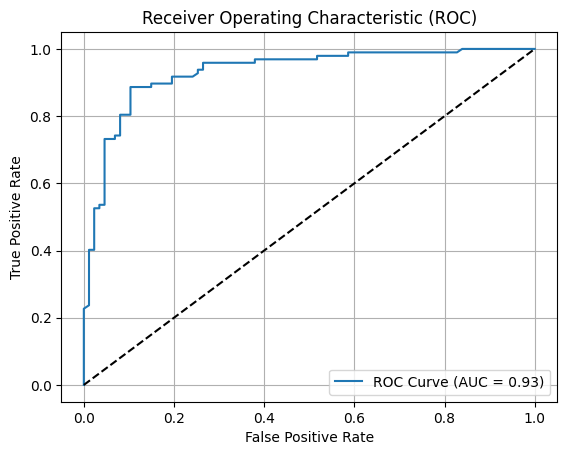

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,
                            criterion='entropy',
                            max_depth = 10)
# Learning
rf.fit(X_train, y_train)

# prediction
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

rank_model(y_test, y_pred, y_prob)
